<a href="https://colab.research.google.com/github/bhargav-joshi/DataWareHousing-Mining/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Algorithm

**Input Data** : X = {x1,...,xN}

**Goal** : Partition the data among some K number of clusters. Let us assume K is known to us.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)

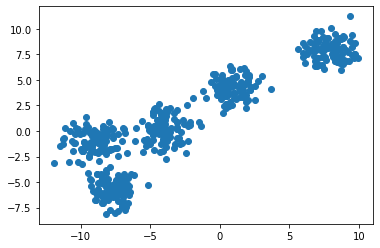

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
k = 5

In [5]:
color = ["red" , "green", "blue", "yellow", "orange"]

In [6]:
clusters = {}

In [7]:

# Initialize clusters - centeroid

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [8]:
clusters

{0: {'center': array([9, 2]), 'color': 'red', 'points': []},
 1: {'center': array([5, 4]), 'color': 'green', 'points': []},
 2: {'center': array([-3,  7]), 'color': 'blue', 'points': []},
 3: {'center': array([ 0, -7]), 'color': 'yellow', 'points': []},
 4: {'center': array([-5,  1]), 'color': 'orange', 'points': []}}

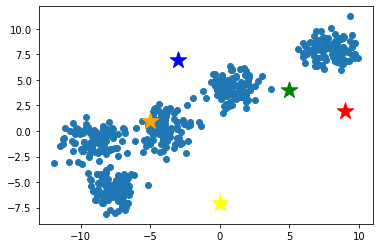

In [9]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="*")
    
plt.show()

### Step 2 - Assign All points to nearest Cluster

In [10]:
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [11]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):
        distance_of_i = []
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center'])
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

In [12]:
assignPointsToCluster(clusters, X)

In [13]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

### Step - 3 Update centers to mean of all points

In [14]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0)
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list 

(18, 2)
(308, 2)
(70, 2)
(60, 2)
(544, 2)


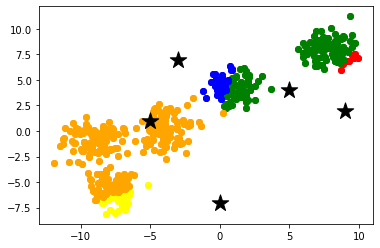

In [15]:
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)

# Actual Ouputs

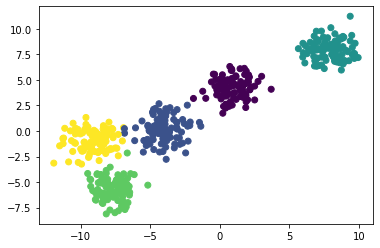

In [16]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

# from Sklearn - KMeans++

In [17]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters=5)

In [19]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
print(km.labels_)

[4 2 3 4 4 3 1 4 2 4 2 3 2 4 3 4 2 4 4 2 0 0 4 3 4 0 1 1 3 1 4 1 0 0 4 0 2
 2 4 0 0 0 1 1 3 2 2 1 1 1 2 4 1 4 4 0 4 4 2 3 2 3 3 4 1 2 3 3 0 3 0 4 0 4
 0 3 4 1 0 0 3 0 3 1 2 1 3 2 1 3 1 0 4 0 0 2 4 3 3 0 2 0 3 3 2 2 2 3 3 4 2
 1 4 2 3 0 2 1 0 3 2 3 1 4 0 1 1 1 4 4 3 3 4 2 2 1 3 1 3 4 4 0 3 2 1 4 2 2
 4 3 4 4 3 3 2 0 0 1 3 4 0 2 1 0 2 0 2 0 0 0 1 4 0 2 0 1 4 3 2 1 2 4 2 0 1
 1 0 4 3 2 0 3 1 4 1 0 3 1 4 4 4 0 0 2 4 1 1 4 2 4 4 4 0 2 3 2 4 4 2 1 3 1
 1 0 4 3 4 3 1 0 3 3 4 0 4 0 3 2 3 0 0 2 4 4 3 3 0 2 0 4 1 2 1 4 1 1 1 1 2
 0 2 4 0 2 1 3 2 2 2 1 4 4 3 0 0 2 3 3 4 3 1 3 2 2 1 1 0 1 1 2 0 4 3 0 3 1
 3 3 2 4 0 2 0 0 4 1 0 3 0 1 4 4 3 2 0 1 2 0 3 1 2 1 4 0 1 3 3 0 0 0 4 1 0
 4 2 3 3 1 2 2 3 3 1 0 0 0 4 1 2 1 4 0 2 2 3 0 0 1 0 1 3 3 3 1 0 4 0 3 1 1
 2 4 2 1 4 1 3 2 0 2 3 4 4 2 2 0 2 0 1 3 2 1 4 4 2 3 0 1 4 4 4 1 2 0 2 2 2
 1 0 3 2 3 3 1 3 4 3 4 2 0 0 4 2 1 4 0 3 2 1 3 1 1 2 1 3 1 2 1 3 1 4 0 0 1
 0 2 0 0 1 4 4 3 1 0 3 1 3 2 3 2 4 0 3 4 3 4 4 0 4 0 1 2 2 3 4 4 1 1 2 1 1
 2 1 2 2 2 1 0 1 3 2 3 3 

In [21]:
km.cluster_centers_

array([[ 0.88641907,  4.19441853],
       [-9.0671623 , -0.96740759],
       [ 7.8649674 ,  7.97988109],
       [-3.97953526,  0.19458336],
       [-7.6726196 , -5.69211059]])

In [22]:
km.inertia_

999.7464835530949

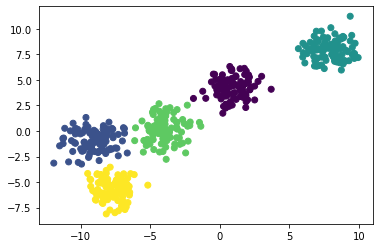

In [23]:
plt.scatter(X[:,0], X[:, 1], c= km.labels_)